### New York City Airbnb data:

#### This is a dataset that contains Airbnb data on New York City. You will use it to practice your new EDA (exploratory data analysis) and data cleaning skills.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Step 1: Use the following online dataset: https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv

In [2]:
# Read the dataset from the URL and assing it to a Pandas DataFrame
df_airbnb_ny = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df_airbnb_ny

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


##### Step 2: Find patterns and valuable information as much as you can. Make graphs that help us understand the patterns found, get some statistics, create new variables if needed, etc.

In [3]:
# Obtain the information of the dataset
df_airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can see that there are 16 columns and 48895 rows in the dataset.
- There are some missing values in the columns 'name', 'host_name', 'last_review' and 'reviews_per_month'.

This dataset has 6 numerical columns and 10 categorical columns:
- The numerical columns are: 'id', 'host_id', 'latitude', 'longitude', 'price' and 'minimum_nights'
- The categorical columns are: 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'

In [4]:
# We can assume that the columns 'id', 'name', 'host_name', 'last_review' and 'reviews_per_month' are not relevant for our analysis because there are missing values and they are not relevant for our analysis
# We are going to drop these columns from the dataset
df_airbnb_ny = df_airbnb_ny.drop(['id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1)
df_airbnb_ny.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [5]:
# let's rename the column 'neighbourhood_group' to 'areas' and 'neighbourhood' to 'neighborhood' to make it easier to understand
df_airbnb_ny.rename(columns={'neighbourhood_group':'areas', 'neighbourhood':'neighborhood'}, inplace=True)
# We check again the information of the dataset
df_airbnb_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   areas                           48895 non-null  object 
 2   neighborhood                    48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


##### Univariant analysis of the categorical variables

In [6]:
# Now, we have a dataset with 48,895 rows and 7 columns and we can start to explore the data
# Let's check the distribution of the data
df_airbnb_ny.describe(include='all')

,host_id,areas,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
unique,NaN,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,NaN,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN
mean,6.762001e+07,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.000000,227.000000


For the categorical variables, we can see the following:
- There are 5 areas in the dataset: Brooklyn, Manhattan, Queens, Staten Island and Bronx and the most frequent area is Manhattan
- There are 221 neighborhoods in the dataset and the most frequent neighborhood is Williamsburg
- There are 3 types of rooms: Entire home/apt, Private room and Shared room and the most frequent type of room is Entire home/apt

For the numerical variables, we can see the following:
- The minimum price is 0, which is not possible, so we need to check this. The maximum price is 10,000, which is a very high price because the 75% of the prices are less than 175.
- The minimum number of nights is 1, which is the most frequent number of nights. The maximum number of nights is 1,250, which is a very high number of nights because the 75% of the number of nights are less than 5.

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

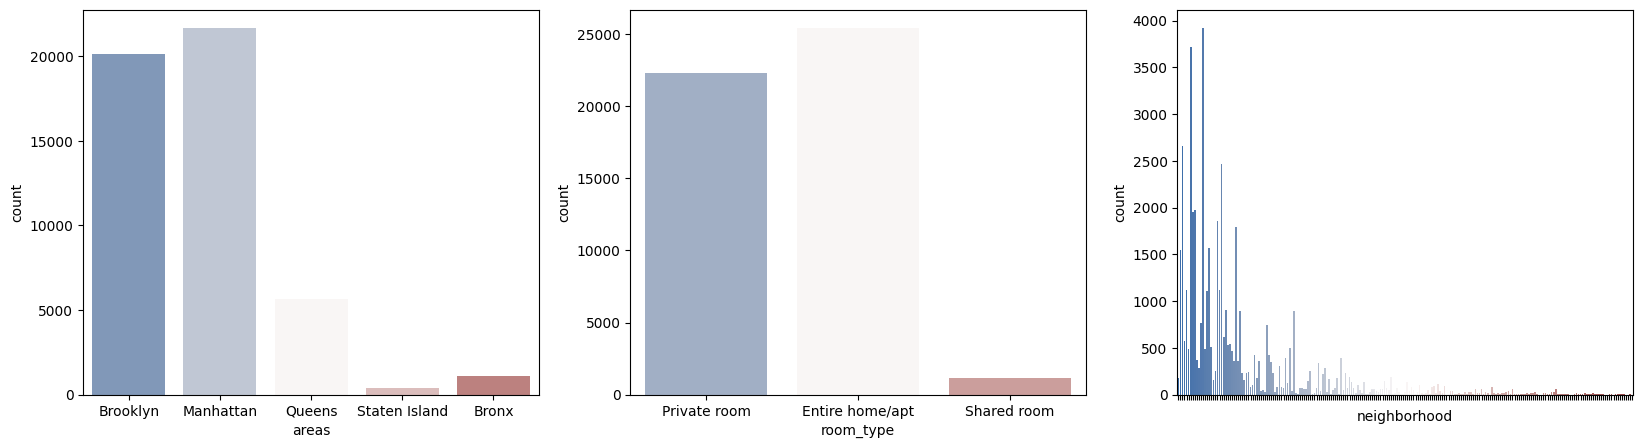

In [7]:
# We can see this better with a counterplot of the categorical columns
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Countplot for 'areas'
sns.countplot(data = df_airbnb_ny, x = 'areas', ax=ax[0], palette='vlag')
# Countplot for 'room_type'
sns.countplot(data = df_airbnb_ny, x = 'room_type', ax=ax[1], palette='vlag')
# Countplot for 'neighborhood' without xticks
sns.countplot(data = df_airbnb_ny, x = 'neighborhood', ax=ax[2], palette='vlag').set_xticklabels([])
plt.show()

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

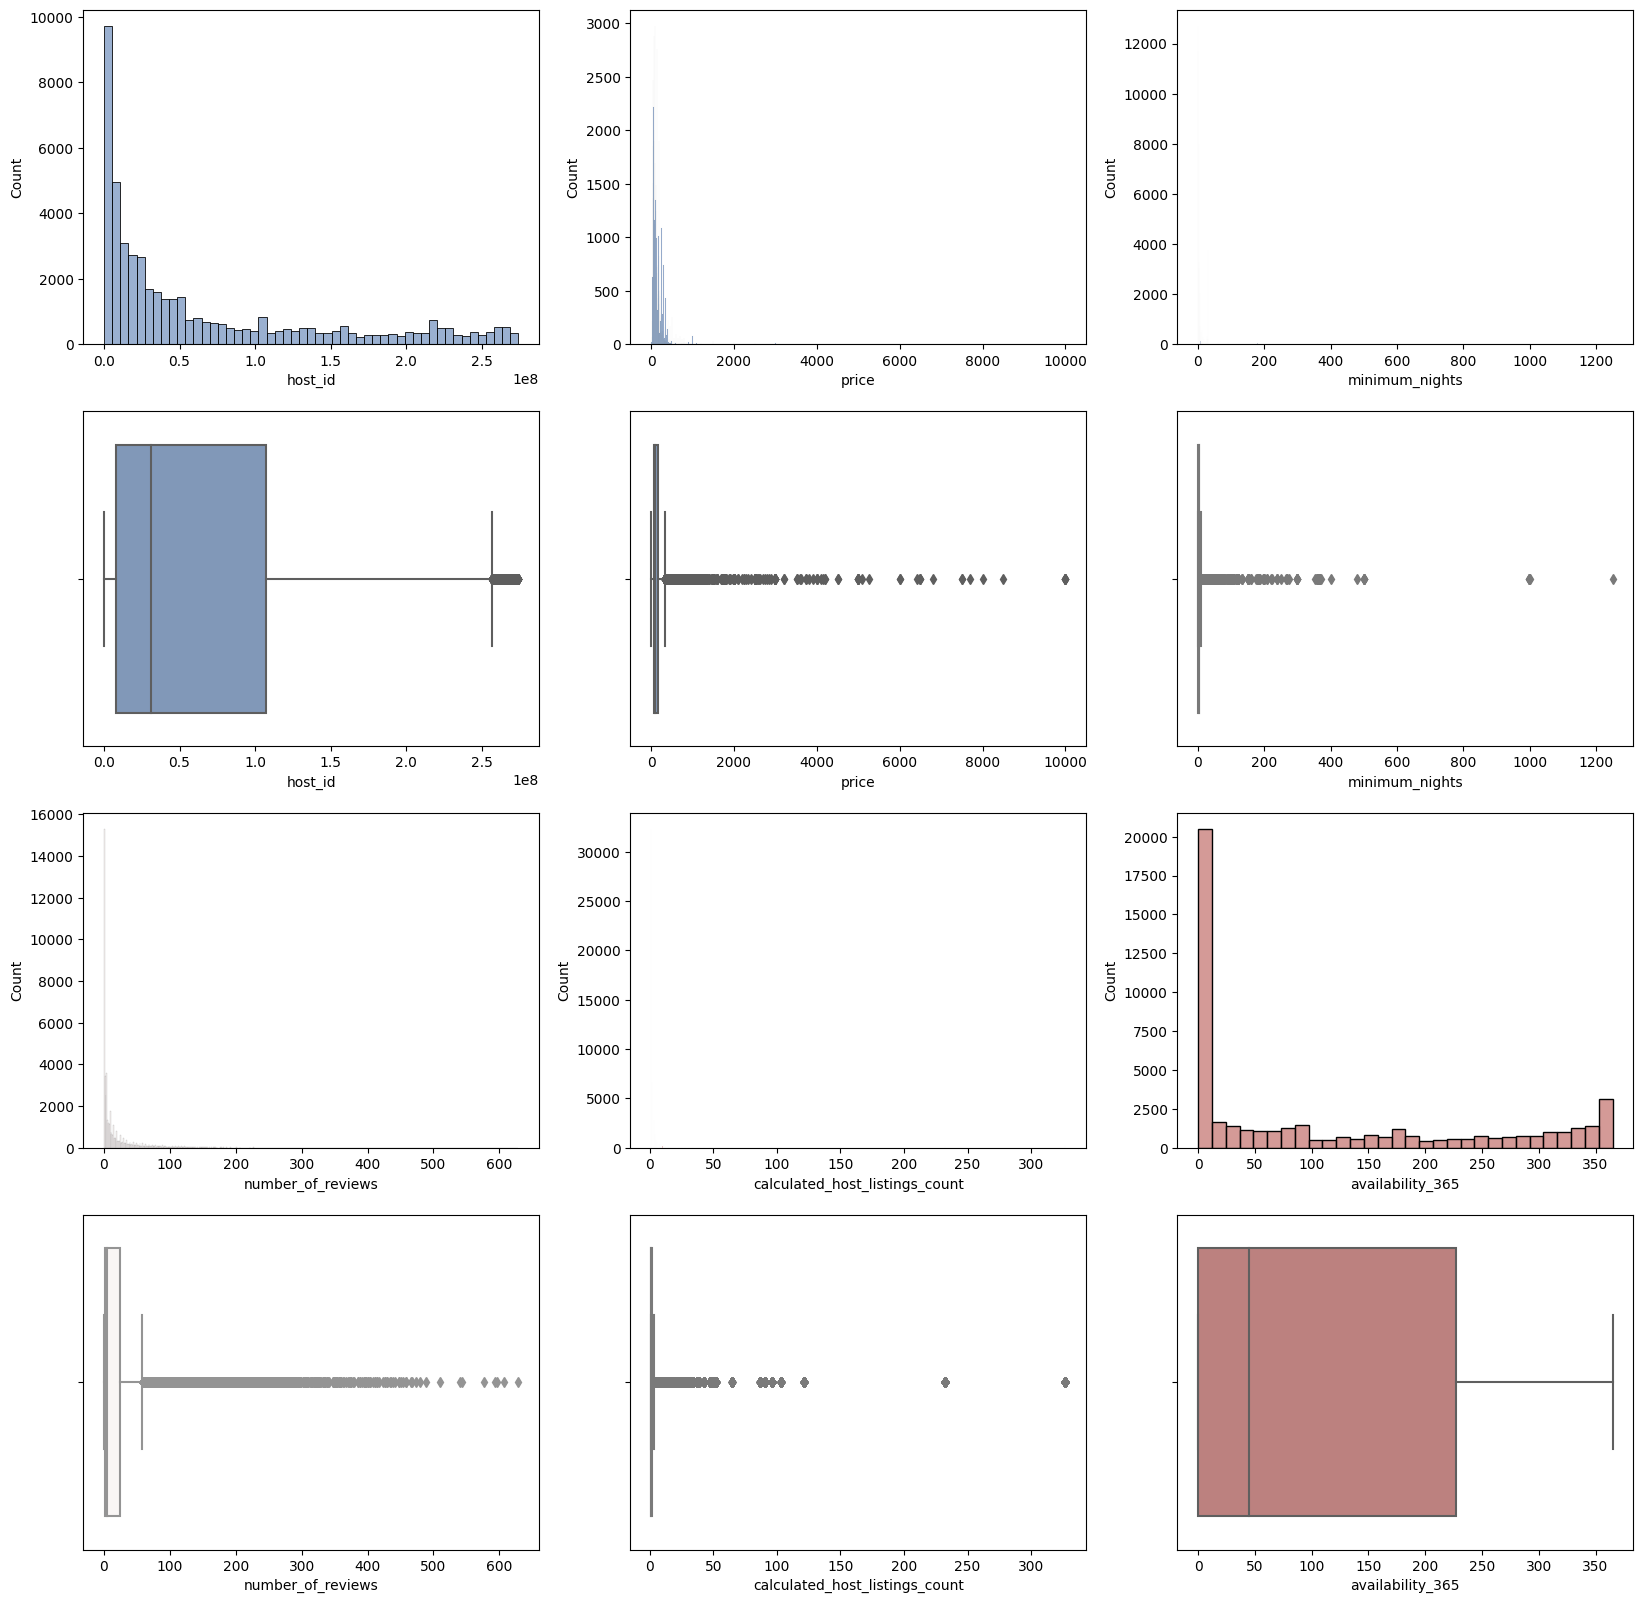

In [10]:
# Now, we are going to check the distribution of the numerical columns with a histogram and a boxplot
fig, ax = plt.subplots(4, 3, figsize=(20, 20))

colors = sns.color_palette("vlag", 5)

# Histogram for 'host_id'
sns.histplot(data = df_airbnb_ny, x = 'host_id', ax=ax[0,0], color=colors[0])
# Boxplot for 'host_id'
sns.boxplot(data = df_airbnb_ny, x = 'host_id', ax=ax[1,0], color=colors[0])
# Histogram for 'price'
sns.histplot(data = df_airbnb_ny, x = 'price', ax=ax[0,1], color=colors[0])
# Boxplot for 'price'
sns.boxplot(data = df_airbnb_ny, x = 'price', ax=ax[1,1], color=colors[0])
# Histogram for 'minimum_nights'
sns.histplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[0,2], color=colors[1])
# Boxplot for 'minimum_nights'
sns.boxplot(data = df_airbnb_ny, x = 'minimum_nights', ax=ax[1,2], color=colors[1])
# Histogram for 'number_of_reviews'
sns.histplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[2,0], color=colors[2])
# Boxplot for 'number_of_reviews'
sns.boxplot(data = df_airbnb_ny, x = 'number_of_reviews', ax=ax[3,0], color=colors[2])
# Histogram for 'calculated_host_listings_count'
sns.histplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[2,1], color=colors[3])
# Boxplot for 'calculated_host_listings_count'
sns.boxplot(data = df_airbnb_ny, x = 'calculated_host_listings_count', ax=ax[3,1], color=colors[3])
# Histogram for 'availability_365'
sns.histplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[2,2], color=colors[4])
# Boxplot for 'availability_365'
sns.boxplot(data = df_airbnb_ny, x = 'availability_365', ax=ax[3,2], color=colors[4])

plt.show()


##### Analysis of Multivariate Variables